# Exercise: Analysing stock data using NumPy

## Stage 1: Load, Display, and Analyze Stock Data 
Objective: Load the CSV data (numpy1.csv), manipulate the data using NumPy operations, calculate basic statistics for each stock, and plot the stock prices over time with additional statistics.

Step-by-Step Task:
1. Load the data using numpy.genfromtxt().

2. Use NumPy slicing and indexing to handle data efficiently.

3. Calculate basic statistics for each stock:

Mean price
Maximum price
Minimum price
4. Plot the stock prices over time along with the calculated statistics.

Basic Statistics for Each Stock:
Stock A: Mean=105.68, Max=110.00, Min=100.58
Stock B: Mean=149.85, Max=152.01, Min=147.19
Stock C: Mean=201.17, Max=204.93, Min=197.67


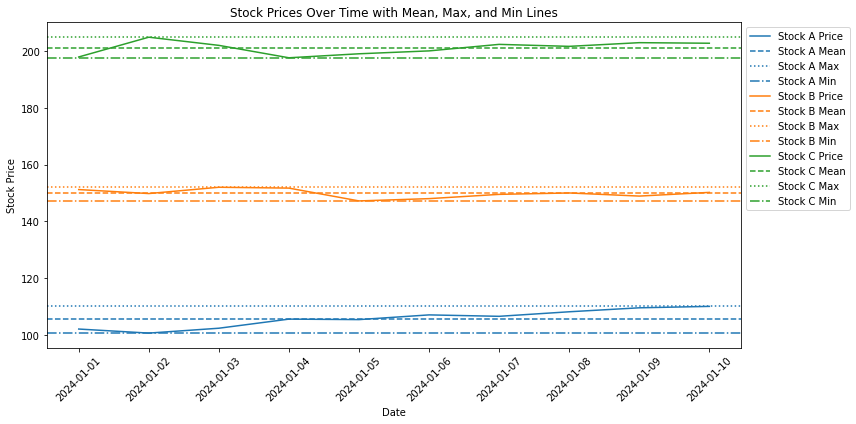

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data using numpy.genfromtxt()

# Load dates (first column)
dates = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=str, skip_header=1, usecols=0)

# Load prices (columns 1 to 3)
prices = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=float, skip_header=1, usecols=(1, 2, 3))

# Hardcode stock names
stock_names = ['Stock A', 'Stock B', 'Stock C']

# Step 2: Use NumPy slicing and indexing to handle data efficiently.
# (This is inherently done in how we handle 'prices' and 'dates')

# Step 3: Calculate basic statistics for each stock.

# Calculate mean, max, and min prices for each stock
mean_prices = np.mean(prices, axis=0)
max_prices = np.max(prices, axis=0)
min_prices = np.min(prices, axis=0)

# Display the statistics
print("Basic Statistics for Each Stock:")
for i, stock in enumerate(stock_names):
    print(f"{stock}: Mean={mean_prices[i]:.2f}, Max={max_prices[i]:.2f}, Min={min_prices[i]:.2f}")

# Step 4: Plot the stock prices over time along with the calculated statistics.

plt.figure(figsize=(12, 6))

for i, stock in enumerate(stock_names):
    # Plot stock prices over time
    plt.plot(dates, prices[:, i], label=f"{stock} Price")
    # Plot mean line
    plt.axhline(mean_prices[i], color=f"C{i}", linestyle='--', label=f"{stock} Mean")
    # Plot max line
    plt.axhline(max_prices[i], color=f"C{i}", linestyle=':', label=f"{stock} Max")
    # Plot min line
    plt.axhline(min_prices[i], color=f"C{i}", linestyle='-.', label=f"{stock} Min")

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time with Mean, Max, and Min Lines')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


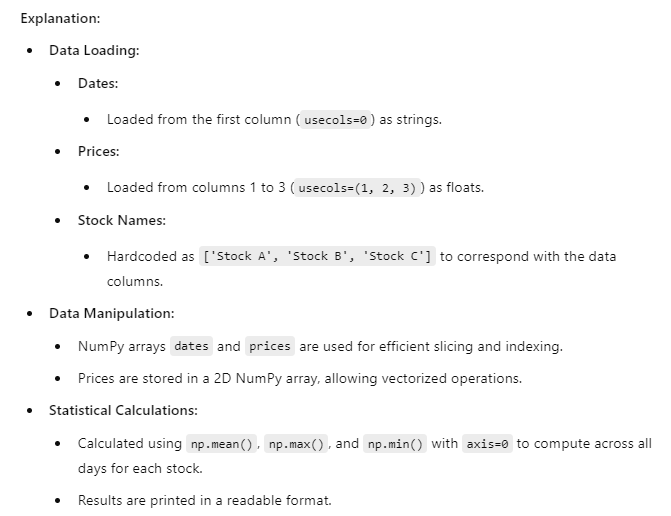
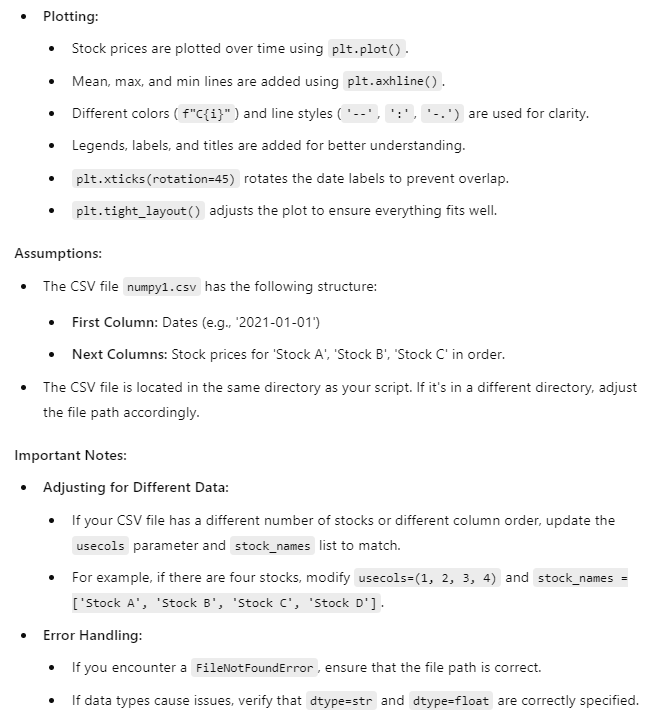

# Common mistakes:

**1. Hardcoding Incorrect Column Indices:**

- Using the wrong column numbers in usecols, leading to incorrect data being loaded.
- Tip: Verify the structure of the CSV file to ensure the correct columns are selected.

**2. Mismatch Between Stock Names and Data Columns:**

- Misaligning the stock_names list with the order of columns in prices, causing labels and data to mismatch.
- Tip: Ensure that the stock names correspond exactly to the columns you're loading.

**3. Incorrect Data Types:**

- Forgetting to specify dtype=str for dates, resulting in dates being read as nan (not a number) if they can't be converted to floats.
- Tip: Always check the data types required for different columns.

**4. Axis Misalignment in Calculations:**

- Using axis=1 instead of axis=0 when computing statistics, which would compute statistics across stocks for each day rather than across days for each stock.
- Tip: Remember that axis=0 operates down the rows (across days), and axis=1 operates across the columns.

**5. Plotting Issues:**

- Not rotating the x-axis labels, causing dates to overlap and become unreadable.
- Forgetting to include legends or labels, making the plot confusing.
- Tip: Use plt.xticks(rotation=45) and include legends and labels for clarity.

**6. Using plt.axhline() Incorrectly:**

- Applying plt.axhline() outside the loop, causing all lines to be drawn at the same value.
- Tip: Ensure plt.axhline() is inside the loop and uses the correct statistic for each stock.

**7. Variable Overwrites:**

- Accidentally overwriting important variables by reusing names.
- Tip: Use unique variable names and be cautious when reassigning variables.

**8. File Reading Errors:**

- Misspelling the filename or incorrect file path, leading to FileNotFoundError.
- Tip: Double-check the filename and ensure the file is in the correct directory.

## Stage 2: Calculate Portfolio Returns Using Dot Product 

In this exercise we'll build on NumPy operations and introduce more advanced concepts like dot product and matrix multiplication. Students will calculate portfolio returns based on a set of stock weights.

Objectives: Given a set of stock weights in a portfolio, calculate the portfolio returns for each day using the dot product of stock prices and weights. .

Step-by-Step Task:
Define an array of weights for the three stocks in the portfolio.
Ensure the correct shape of the weights and the stock price data.
Use NumPy's dot() function to calculate the portfolio returns over time.
Display the portfolio returns for each day.

Portfolio Returns for Each Day:
Date: 2024-01-01, Portfolio Return: 135.96
Date: 2024-01-02, Portfolio Return: 136.21
Date: 2024-01-03, Portfolio Return: 137.16
Date: 2024-01-04, Portfolio Return: 137.80
Date: 2024-01-05, Portfolio Return: 136.64
Date: 2024-01-06, Portfolio Return: 137.92
Date: 2024-01-07, Portfolio Return: 138.58
Date: 2024-01-08, Portfolio Return: 139.39
Date: 2024-01-09, Portfolio Return: 140.02
Date: 2024-01-10, Portfolio Return: 140.62


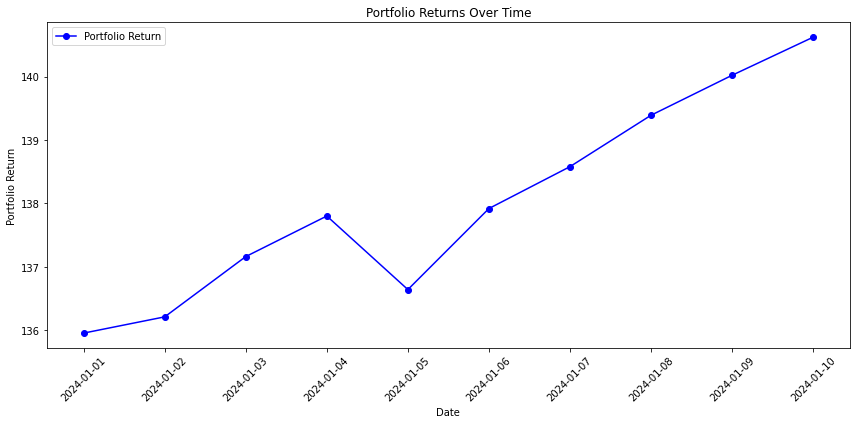

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load dates (first column)
dates = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=str, skip_header=1, usecols=0)

# Load prices (columns 1 to 3)
prices = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=float, skip_header=1, usecols=(1, 2, 3))

# Convert dates to a more readable format (assuming 'YYYY-MM-DD' format)
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Define an array of weights for the three stocks in the portfolio

# Example weights for each stock
weights = np.array([0.5, 0.3, 0.2])  # The weights should sum to 1 if they represent proportions

# Ensure the weights sum to 1 (normalize weights)
weights = weights / np.sum(weights)

# Use NumPy's dot() function to calculate the portfolio returns over time

# Calculate the portfolio returns for each day
portfolio_returns = np.dot(prices, weights)

# Display the portfolio returns for each day

print("Portfolio Returns for Each Day:")
for date, p_return in zip(dates, portfolio_returns):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Portfolio Return: {p_return:.2f}")

# Plot the portfolio returns over time

plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_returns, marker='o', label='Portfolio Return', color='b')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.title('Portfolio Returns Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


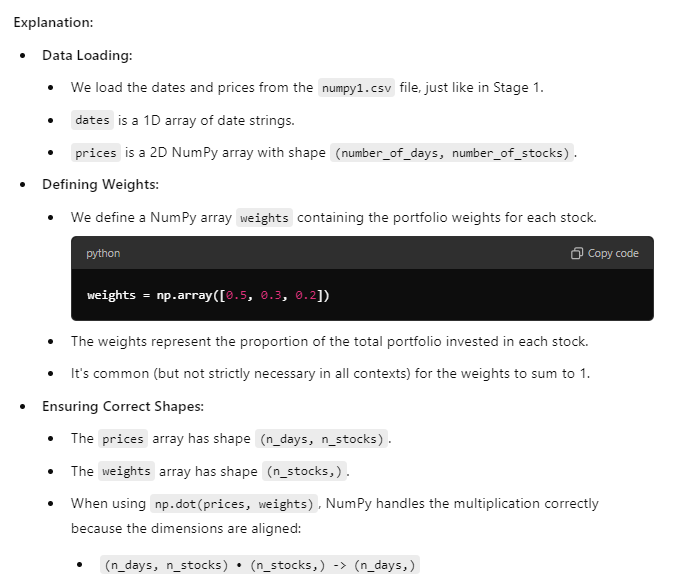
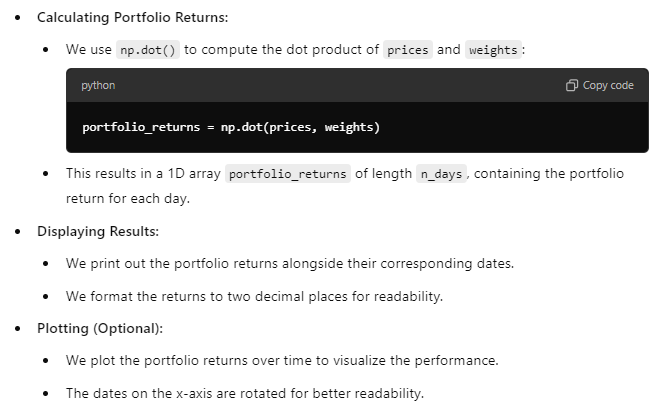


# Common mistakes:


**1. Incorrect Shape of Weights Array:**

- Mistake: Defining weights as a column vector or 2D array, e.g., weights = np.array([[0.5], [0.3], [0.2]]).
This can lead to shape misalignment when performing the dot product.

- Solution: Ensure weights is a 1D array of shape (n_stocks,). Correct way: weights = np.array([0.5, 0.3, 0.2]).

**2. Dimension Mismatch in Dot Product:**

- Mistake: Misaligning dimensions by transposing arrays incorrectly or not understanding the shapes. For example, attempting np.dot(weights, prices), which results in a shape error.

- Solution: Use np.dot(prices, weights) when prices is (n_days, n_stocks) and weights is (n_stocks,).

**3. Confusion Between Matrix Multiplication and Dot Product:**

- Mistake: Using np.matmul() or the @ operator incorrectly, leading to unexpected results.

- Solution: Use np.dot() for dot product between a 2D array and a 1D array. Understand that for 1D arrays, np.dot() and np.matmul() behave differently.

**4. Weights Not Summing to 1:**

- Mistake: Defining weights that don't sum to 1 when proportions are expected. This might not cause errors but can lead to misinterpretation of results.

- Solution: Ensure the weights sum to 1 if they represent portfolio proportions. Normalize weights if necessary:
        - **python code: weights = weights / np.sum(weights)**


**5. Incorrect Use of Axes:**

- Mistake: Misusing axis parameters in functions or misunderstanding how data is organized.

- Solution: Remember that prices is organized with days as rows and stocks as columns. No need to specify axes when using np.dot() as it handles the dimensions automatically.

**6. Not Loading Data Correctly:**

- Mistake: Forgetting to load the data or incorrectly loading the data types. For example, reading prices as strings instead of floats.

- Solution: Ensure prices is loaded with dtype=float. Double-check the usecols parameter to select the correct columns.

**7. Misinterpreting Prices Data:**

- Mistake: Confusing rows and columns, leading to incorrect calculations. For example, treating prices as if stocks are rows and days are columns.

- Solution: Verify the shape of prices using prices.shape. Ensure that prices has shape (n_days, n_stocks).

**8. Incorrect Looping When Displaying Results:**

- Mistake: Mismatching dates and portfolio returns when printing results.

- Solution: Use zip(dates, portfolio_returns) to iterate over both arrays simultaneously.

**9. Type Errors Due to Mixed Data Types:**

- Mistake: Performing operations between arrays of different data types (e.g., strings and floats).
- Solution: Ensure all numerical data is of type float or int before performing calculations.

**10. Ignoring Broadcasting Rules:**

- Mistake: Assuming NumPy will automatically broadcast arrays in incompatible shapes.

- Solution: Understand that for np.dot(), the inner dimensions must match. For element-wise multiplication, shapes must be compatible according to broadcasting rules

## Stage 3: Reshape Stock Prices and Calculate Moving Averages 

Objective: Use NumPy’s reshape() to change the shape of a stock price matrix. After reshaping the data, calculate a 3-day moving average for each stock and display the results.

Step-by-Step Task:

- Load the Data: Use np.genfromtxt() to load stock prices and dates from the CSV file into a flat 1D array.
Reshape the Data: Use np.reshape() to convert the flat stock price array into a 2D array with shape (number of days, 3 stocks).
- Define a Moving Average Function: Write a function using np.convolve() to calculate the 3-day moving average for each stock.
- Apply the Moving Average: Use array slicing to select stock prices for each stock, then apply the moving average function to compute the averages.
- Display Results: Print the reshaped stock prices and the calculated moving averages for each stock, ensuring the dates align with the reduced data points. 

In [3]:
import numpy as np

# Step 1: Load the Data
# Use np.genfromtxt() to load stock prices and dates from the CSV file into a flat 1D array.

# Load dates into a 1D array
dates = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=str, skip_header=1, usecols=0)

# Load prices into a flat 1D array (flattened after loading)
prices_flat = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=float, skip_header=1, usecols=(1, 2, 3)).flatten()

# Step 2: Reshape the Data
# Use np.reshape() to convert the flat stock price array into a 2D array with shape (number of days, 3 stocks).

n_days = len(dates)
prices_reshaped = prices_flat.reshape((n_days, 3))

# Step 3: Define a Moving Average Function
# Write a function using np.convolve() to calculate the 3-day moving average for each stock.

def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

# Step 4: Apply the Moving Average
# Use array slicing to select stock prices for each stock, then apply the moving average function.

stock_names = ['Stock A', 'Stock B', 'Stock C']
ma_results = {}

for i, stock_name in enumerate(stock_names):
    stock_prices = prices_reshaped[:, i]
    ma = moving_average(stock_prices, 3)
    ma_results[stock_name] = ma

# Adjust dates to align with moving averages
ma_dates = dates[2:]  # Skip the first two dates since window_size - 1 data points are lost

# Step 5: Display Results
# Print the reshaped stock prices and the calculated moving averages for each stock.

print("Reshaped Stock Prices:")
print(prices_reshaped)

print("\n3-Day Moving Averages for Each Stock:")
for stock_name in stock_names:
    print(f"\n{stock_name} Moving Averages:")
    for date, ma_value in zip(ma_dates, ma_results[stock_name]):
        print(f"Date: {date}, Moving Average: {ma_value:.2f}")


Reshaped Stock Prices:
[[102.01 151.2  197.96]
 [100.58 149.79 204.93]
 [102.3  152.01 202.05]
 [105.51 151.71 197.67]
 [105.34 147.19 199.08]
 [107.   148.   200.1 ]
 [106.5  149.5  202.4 ]
 [108.1  150.   201.7 ]
 [109.5  148.9  203.  ]
 [110.   150.2  202.8 ]]

3-Day Moving Averages for Each Stock:

Stock A Moving Averages:
Date: 2024-01-03, Moving Average: 101.63
Date: 2024-01-04, Moving Average: 102.80
Date: 2024-01-05, Moving Average: 104.38
Date: 2024-01-06, Moving Average: 105.95
Date: 2024-01-07, Moving Average: 106.28
Date: 2024-01-08, Moving Average: 107.20
Date: 2024-01-09, Moving Average: 108.03
Date: 2024-01-10, Moving Average: 109.20

Stock B Moving Averages:
Date: 2024-01-03, Moving Average: 151.00
Date: 2024-01-04, Moving Average: 151.17
Date: 2024-01-05, Moving Average: 150.30
Date: 2024-01-06, Moving Average: 148.97
Date: 2024-01-07, Moving Average: 148.23
Date: 2024-01-08, Moving Average: 149.17
Date: 2024-01-09, Moving Average: 149.47
Date: 2024-01-10, Moving Avera

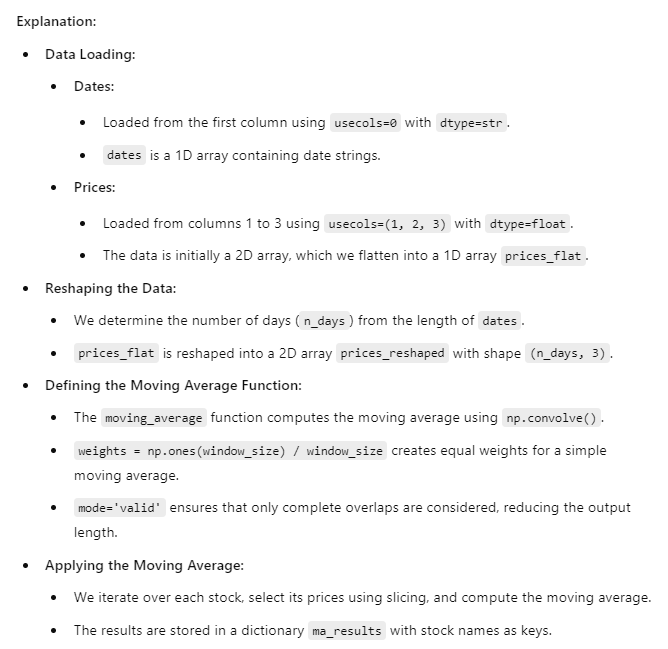
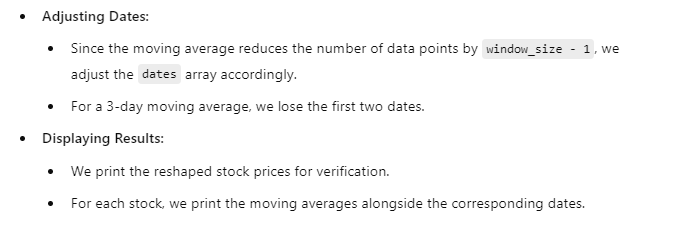

# Common mistakes:


**1. Incorrect Reshaping Dimensions:**

- Mistake: Using the wrong shape when reshaping the array, such as prices_flat.reshape((3, n_days)), which transposes the intended dimensions.

- Solution: Ensure you reshape to (n_days, n_stocks). Use prices_flat.reshape((n_days, 3)) where 3 is the number of stocks.

**2. Flattening Unnecessarily or Incorrectly:**

Mistake: Flattening an already flat array or flattening before loading the data.
Solution: Flatten after loading the data into a 2D array. Use flatten() method on the loaded array.

**3. Misaligning Dates and Moving Averages:**

- Mistake: Not adjusting the dates array after calculating the moving averages, leading to mismatched dates and values.

- Solution: Adjust the dates array by slicing off the first window_size - 1 dates. For a 3-day window, use ma_dates = dates[2:].

**4. Incorrect Use of np.convolve() Parameters:**

- Mistake: Using mode='full' or mode='same' in np.convolve(), resulting in output arrays of incorrect lengths.

- Solution: Use mode='valid' to ensure the output length is len(data) - window_size + 1.

**5. Not Normalizing Weights in Moving Average:**

- Mistake: Forgetting to divide by the sum of the weights, causing incorrect moving average values.
  
- Solution: For a simple moving average, create normalized weights: weights = np.ones(window_size) / window_size.

**6. Incorrectly Slicing Stock Prices:**

- Mistake: Mixing up rows and columns when slicing, e.g., prices_reshaped[i, :] instead of prices_reshaped[:, i].

- Solution: Remember that prices_reshaped[:, i] selects all rows for the i-th column (stock).

**7. Data Type Errors:**

- Mistake: Loading numerical data as strings due to incorrect dtype, leading to computation errors.

- Solution: Specify dtype=float when loading prices.

**8. Assuming Incorrect Number of Stocks or Days:**

- Mistake: Hardcoding numbers without verifying, which can cause ValueError during reshaping.
  
- Solution: Use variables for dimensions and verify shapes before reshaping.

**9. Forgetting to Adjust for Reduced Data Points:**

- Mistake: Not accounting for the reduced number of data points after applying the moving average, leading to index errors.

- Solution: Always adjust your arrays to match the new length after convolution.

**10. Incorrectly Using the Moving Average Function:**

- Mistake: Passing the entire 2D array to moving_average() instead of individual stock arrays.
- Solution: Apply the moving average function to each stock's price array separately.

## Stage 4: Correlation Between Stocks Using Transpose

Objective: Compute the correlation matrix between the three stocks using NumPy and handle the stock data using transpose to align dimensions.

Step-by-Step Task:

- Transpose the stock price matrix to align stocks for correlation calculations.
- Use np.corrcoef() to compute the correlation matrix.
- Display the correlation matrix.

In [4]:
import numpy as np

# Step 1: Load the Data
# Load stock prices from the CSV file into a NumPy array.

# Load prices (columns 1 to 3)
prices = np.genfromtxt('./Data/numpy1.csv', delimiter=',', dtype=float, skip_header=1, usecols=(1, 2, 3))

# Define stock names for clarity
stock_names = ['Stock A', 'Stock B', 'Stock C']

# Step 2: Transpose the stock price matrix
# Transpose the matrix to have stocks as rows and days as columns.

prices_transposed = prices.T  # Shape becomes (n_stocks, n_days)

# Step 3: Use np.corrcoef() to compute the correlation matrix

correlation_matrix = np.corrcoef(prices_transposed)

# Step 4: Display the correlation matrix

print("Correlation Matrix between Stocks:")
print(correlation_matrix)

# Optionally, display the correlation matrix with stock names for better readability
print("\nCorrelation Matrix with Stock Labels:")

# Create a formatted correlation matrix with labels
print(f"{'':10s}", end='')
for name in stock_names:
    print(f"{name:>10s}", end='')
print()

for i, row in enumerate(correlation_matrix):
    print(f"{stock_names[i]:10s}", end='')
    for value in row:
        print(f"{value:10.2f}", end='')
    print()


Correlation Matrix between Stocks:
[[ 1.         -0.3541621   0.08527942]
 [-0.3541621   1.         -0.09502269]
 [ 0.08527942 -0.09502269  1.        ]]

Correlation Matrix with Stock Labels:
             Stock A   Stock B   Stock C
Stock A         1.00     -0.35      0.09
Stock B        -0.35      1.00     -0.10
Stock C         0.09     -0.10      1.00


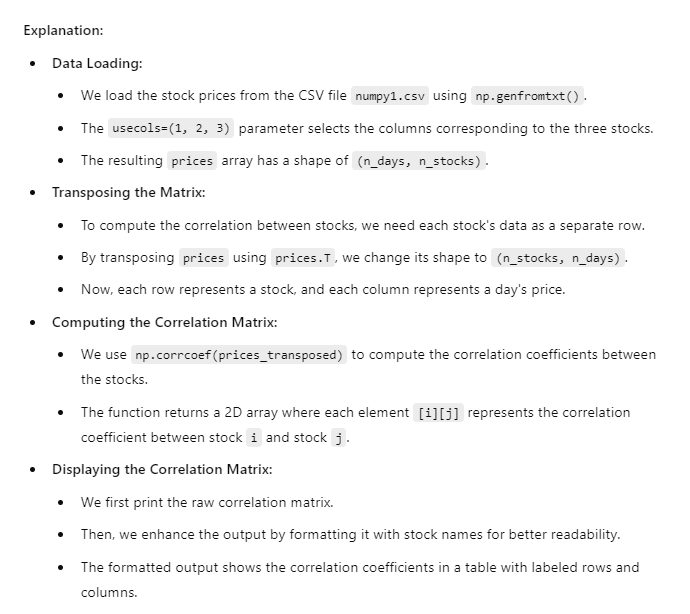

## Common mistakes:


**1. Not Transposing the Price Matrix:**

- Mistake: Forgetting to transpose the prices array before computing the correlation, leading to incorrect results.
- Solution: Ensure you transpose the price matrix so that each row corresponds to a stock. Use prices_transposed = prices.T.

**2. Misunderstanding Data Orientation:**

- Mistake: Assuming that stocks are already in rows and days are in columns, leading to double transposition or no transposition when needed.
- Solution: Verify the shape of your prices array using prices.shape. Remember that after loading, prices is typically (n_days, n_stocks).

**3. Incorrect Use of np.corrcoef():**

- Mistake: Misusing np.corrcoef() by passing in arrays with incorrect shapes or dimensions. For example, passing in a 1D array or not specifying the correct axis.
 - Solution: Ensure that np.corrcoef() receives a 2D array where each row is a variable (stock) and each column is an observation (day). Use np.corrcoef(prices_transposed).

**4. Data Type Issues:**

- Mistake: Loading data with incorrect dtype, such as reading prices as strings instead of floats.
- Solution: Specify dtype=float when loading numerical data. Check the data types using prices.dtype.

**5. Indexing Errors in Displaying Results:**

- Mistake: Misaligning stock names with correlation coefficients when printing the matrix.
- Solution: Use consistent indexing when iterating over the correlation matrix and stock names. Verify that the order of stock names matches the order of stocks in the data.
 
**6. Assuming Perfect Correlation:**

- Mistake: Expecting the correlation coefficients to be exactly 1 or -1 due to small sample sizes or rounding errors.
- Solution: Understand that real-world data often results in correlation coefficients that are close to, but not exactly, 1 or -1. Accept minor deviations as part of numerical computations.

**7. Not Handling Missing or NaN Values:**

- Mistake: Failing to account for missing data, which can result in NaN values in the correlation matrix.
- Solution: Check for missing values in your data and handle them appropriately (e.g., imputation, removal).
Use functions like np.isnan() to detect NaNs.

**8. Confusion Between Covariance and Correlation:**

- Mistake: Using np.cov() instead of np.corrcoef(), leading to covariance matrix instead of correlation matrix.
- Solution: Use np.corrcoef() to compute the correlation matrix. Remember that correlation is a standardized measure of the relationship between variables.
  
**9. Misinterpreting the Correlation Matrix:**

Mistake: Not understanding that the correlation matrix is symmetrical and that diagonal elements are always 1.
Solution: Recognize that correlation_matrix[i][j] equals correlation_matrix[j][i]. Diagonal elements represent the correlation of a stock with itself, hence they are 1.

**10. Not Using Sufficient Data:**

- Mistake: Using too few data points, which can lead to unreliable correlation coefficients.
- Solution: Ensure that you have enough observations (days) to compute meaningful correlations. Be cautious when interpreting results from small datasets.